# Carga de Datos

En esta sección se cubren los siguentes temas:

* Representación de los datos para Aprendizaje Automático en Scikit-learn
* Carga de datos de ejemplos en scikit-learn
* Carga de datos desde otras fuentes
* Otros datos en scikit-learn

Se agregan ejemplo de la carga de datos y de pre-procesamiento, exploración y aplicción de algún algoritmo. Para esto se hace uso de Pandas, seaborn, matplotlib y scikit-learn.

#  Representación de datos para Aprendizaje Automático en scikit-learn

En general los datos sobre los cuales se aplicará algún algoritmo se ve como una matriz de datos, donde cada fila de la matriz es considerada como una *muestra de datos* y cada columna como una *variable*.

Ejemplo, un conjunto de datos con 1500 muestras y 10 variables se visualizará como una matriz de $\mathbb{R}^{1500 \times 10}$:


$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{10}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{10}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(1500)} & x_{2}^{(1500)} & x_{3}^{(1500)} & \dots  & x_{10}^{(150)}
\end{bmatrix}.
$$

La matriz de datos se ve como una tabla (DataFrame en Pandas),un arreglo (array en Numpy) o una matriz de scipy, estos son los insumos para aplicar algún algoritmo en scikit-learn.

En la mayoría de los casos un arreglo de Numpy o un DataFrame de Pandas basta,en casos particulares se hace uso de matrices dispersas de scipy.

## Carga de datos de ejemplos en scikit-learn

En la biblioteca se cuenta con un conjuntos de datos de ejemplos. Todos los datos de prueba se cargan y formalmente se carga en Python como un [diccionario](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). Las claves del diccionario en general son:

* data
* target
* target_names
* DESCR
* feature_names

La clave "DESCR", explica todos los detalles de la fuente de los datos y las referencias. También se cuenta con funciones para generar datos para pruebas de distintas familiar de algoritmos.

Para hacer uso de los datos basta con cargar lo siguiente:

```bash
from sklearn.datasets 
```
De allí se importa la muestra de datos elegida.

### Ejemplo de la carga de datos.

Para el primer ejemplo se usarán datos de prueba, en cada parte del código se explica el paso realizado con una breve descripción. El segundo ejemplo muestra el modo de cargar datos desde un folder local y el tercero desde un repositorio externo.

En los ejemplos se hace una breve exploración y revisión de los datos, se hace algún gráfico y se aplica algún método para clasificar o regresión. Lo importante de los ejemplos es la manipulación de los datos, no los modelos aplicados.

In [8]:
#Carga de datos desde el conjunto de datos la biblioteca scikit-learn

from sklearn.datasets import load_breast_cancer 
Data=load_breast_cancer()

In [9]:
#Claves del diccionario de datos o la información que podemos ver de la muestra de datos
Data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [10]:
#Se visualiza la descripción de la información

print(Data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [11]:
#Se manipulan y exploran los datos con DataFrame de Pandas
#Se cargan las bibliotecas para visualización gráfica

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,7)

import pandas as pd
import numpy as np

#Se visualizan las primeras 5 líneas del arreglo de datos
pd.DataFrame(Data.data,columns=Data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Se genera un DataFrame para explorar los datos.

In [12]:
#Se genera el DataFrame con los datos
Datos=pd.DataFrame(Data.data,columns=Data.feature_names)

#Se explora la información relacionada con las variables
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [13]:
#Cargamos la variable dependiente
Target=Data.target

#Las categorías que se tienen son etiquetadas con 0/1
np.unique(Target)

array([0, 1])

Se observa que la muestar de datos cuenta con 30 variables y queremos hacer una clasificación. Con la muestra de datos observamos que son variables que pueden ser modeladas como variables continuas. 

Para este ejemplo, solo hacemos una breve exploración de la relación entre la [**correlación**](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) de las variables, solo como ejemplo gráfico, de momento omitimos hacer cualqueir análisis detallado.

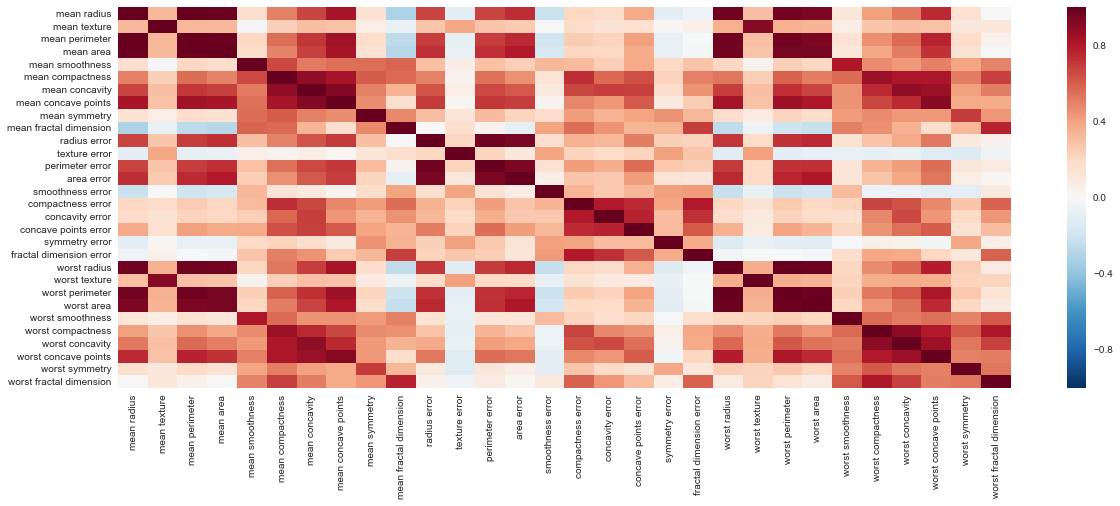

In [14]:
#Mapa de calor entre las variables y ordenas por cluster estimado
DCorrelacion=Datos.corr()
sns.heatmap(DCorrelacion)

El gráfico anterior nos ayuda a ver posibles **asociasiones lineales** entre las 30 variables,de éste gráfico resulta importante solo visualizar la parte superior o inferior de la diagonal, debido a que la correlación cumple con la siguiente relación de simetría: $Cor(X_1,X_2)=Cor(X_2,X_1).$

Aplicamos una **regresión logística** como modelo, de momento imitimos detalles de este método.Pero vemos que es una clasificación binaria, ya que nuestra variable dependiente solo toma valores $0$ y $1$.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Modelo
RL=LogisticRegression()
RL.fit(Datos,Target)

Pred_RL=RL.predict(Datos)
print("Predicción de la Regresión Logística\n")
print("La presición del modelo fue de: %1.5s"% (accuracy_score(Target,Pred_RL)*100)+" %")

Predicción de la Regresión Logística

La presición del modelo fue de: 95.95 %


### Fuente de datos locales

Para el tutorial se cuenta con varios archivos en el folder DataSets, para el primer ejemplo hacemos uso de uno de esos archivo con nombre `transfusion.data.txt`.

In [28]:
#Se cargan las bibliotecas para gráficos y configuramso el entorno.
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,5)

#Se carga pandas y scikit-learn
import pandas as pd
from  sklearn import tree
from sklearn.metrics import accuracy_score

#Se cargan los datos desde el directorio
Transfusiones=pd.read_csv("DataSets/transfusion.data.txt")

In [2]:
#Se visualizan los primeros 5 registros del DataFrame creado con los datos
Transfusiones.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Se realiza una breve exploración y visualización de los datos. Posteriormente se aplica un árbol de decisiones sobrela variable Sexo "*=whether he/she donated blood in March 2017*" 

In [3]:
Transfusiones.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


Vemos que las primeras 4 variables se pueden visualizar como variables *"continuas"*, por lo cual hacemos los histogramas correspondientes.

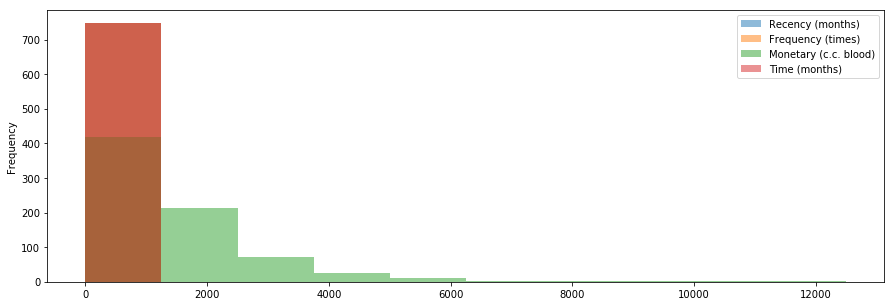

In [33]:
#Se crea el histográma de las primeras 4 variables

Transfusiones.iloc[:,0:4].plot.hist(alpha=0.5)

Vemos con el [histograma](https://es.wikipedia.org/wiki/Histograma) la forma de la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de las variables independientes o predictivas, observamos que tienen una forma peculia. Cuantan con muchos valores pequeños y pocos de magnitud grande.

In [26]:
#Aplicamos un árbol de decisiones sobre la clasificación

X=Transfusiones.iloc[:,0:4]
y=Transfusiones.iloc[:,4]

Modelo=tree.DecisionTreeClassifier()
Modelo.fit(X,y)
Pred=Modelo.predict(X)

print("Predicción del Árbol de Decisiones\n")
print("Valor obtenido de a clasificación: %s"%(accuracy_score(y,Pred)*100)+" %")

Predicción del Árbol de Decisiones

Valor obtenido de a clasificación: 93.1818181818 %


### Ejemplo de carga de datos desde alguna fuente externa

Hoy día se cuentan con muchos repositorios con datos de diferentes tipos. También existen organizaciones de "datos abiertos" en diferentes países. En México la plataforma de datos abiertos se encuentra en el sitio:

* [https://datos.gob.mx/](https://datos.gob.mx/)

También está el banco de datos del INEGI:

* [http://www.inegi.org.mx/](http://www.inegi.org.mx/)

Otros repositorios de organizaciones internacionales como la ONU o el Banco Mundial:

* [http://data.un.org/](http://data.un.org/)
* [http://data.worldbank.org/](http://data.worldbank.org/)

Algúnos repositorios famosos con datos preparados para probar algún algoritmos son:

* [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
* [http://www.kdd.org/](http://www.kdd.org/)
* [https://www.kaggle.com](https://www.kaggle.com/datasets)

Para el ejemplo extremos datos sobre la tasa de desocupación:

*"Proporción de las personas desocupadas, respecto de la Población Económicamente Activa. Este indicador ilustra la magnitud relativa de las personas que desean trabajar y buscan trabajo, pero no lo han encontrado."*

Desde [*Open data México*](https://datos.gob.mx/).

In [51]:
import pandas as pd
import io
import requests


url = "http://datosabiertos.stps.gob.mx/ods/Base_Tasa_de_desocupación.csv"
Info=requests.get(url).content
Tasa_Desocupacion=pd.read_csv(io.StringIO(Info.decode('utf-8')))

In [52]:
Tasa_Desocupacion.head()

,Periodo,Entidad_Federativa,Sexo,Gpo_edad,Pob_desocup,PEA
0,1995,Nacional,Hombres,De 15 a 29 años,"809,806","9,786,726"
1,1995,Nacional,Hombres,De 30 y más años,"589,653","13,391,135"
2,1995,Nacional,Mujeres,De 15 a 29 años,"690,250","5,256,386"
3,1995,Nacional,Mujeres,De 30 y más años,"289,260","6,119,608"
4,1996,Aguascalientes,Hombres,De 15 a 29 años,"6,889","89,952"


In [53]:
Tasa_Desocupacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 6 columns):
Periodo               2184 non-null int64
Entidad_Federativa    2184 non-null object
Sexo                  2184 non-null object
Gpo_edad              2184 non-null object
Pob_desocup           2184 non-null object
PEA                   2184 non-null object
dtypes: int64(1), object(5)
memory usage: 102.5+ KB


Se observa que el tipo de datos de las variables **Pob_desocup** y **PEA** no son numéricas, por lo cual se cambia el tipo de dato. Pero primero se eliman las `','` comas y luego se convierten a números enteros.

In [54]:
#Se eliminan la comas de las cadenas

Tasa_Desocupacion.PEA=Tasa_Desocupacion.PEA.apply(lambda x: x.replace(',','')).copy()
Tasa_Desocupacion.Pob_desocup=Tasa_Desocupacion.Pob_desocup.apply(lambda x: x.replace(',','')).copy()

#Se visualiza la tabla de datos 
Tasa_Desocupacion.head()

,Periodo,Entidad_Federativa,Sexo,Gpo_edad,Pob_desocup,PEA
0,1995,Nacional,Hombres,De 15 a 29 años,809806,9786726
1,1995,Nacional,Hombres,De 30 y más años,589653,13391135
2,1995,Nacional,Mujeres,De 15 a 29 años,690250,5256386
3,1995,Nacional,Mujeres,De 30 y más años,289260,6119608
4,1996,Aguascalientes,Hombres,De 15 a 29 años,6889,89952


In [56]:
#Se cambia el tipo de dato asignado a PEA  y Pob_desocup
Tasa_Desocupacion.PEA=pd.to_numeric(Tasa_Desocupacion.PEA,downcast='float')
Tasa_Desocupacion.Pob_desocup=pd.to_numeric(Tasa_Desocupacion.Pob_desocup,downcast='float')

Tasa_Desocupacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 6 columns):
Periodo               2184 non-null int64
Entidad_Federativa    2184 non-null object
Sexo                  2184 non-null object
Gpo_edad              2184 non-null object
Pob_desocup           2184 non-null float32
PEA                   2184 non-null float32
dtypes: float32(2), int64(1), object(3)
memory usage: 85.4+ KB


In [57]:
Tasa_Desocupacion.head()

,Periodo,Entidad_Federativa,Sexo,Gpo_edad,Pob_desocup,PEA
0,1995,Nacional,Hombres,De 15 a 29 años,809806.0,9786726.0
1,1995,Nacional,Hombres,De 30 y más años,589653.0,13391135.0
2,1995,Nacional,Mujeres,De 15 a 29 años,690250.0,5256386.0
3,1995,Nacional,Mujeres,De 30 y más años,289260.0,6119608.0
4,1996,Aguascalientes,Hombres,De 15 a 29 años,6889.0,89952.0


Exploramos el comportamiento de la tasa de desocupación de los Hombres en cada año por estado y ver como está relacionado con la Poblacion Económiamente Activa.

In [76]:
Datos_Entidades=Tasa_Desocupacion[(Tasa_Desocupacion.Sexo=='Hombres')&(Tasa_Desocupacion.Entidad_Federativa!='Nacional')][['Periodo','Entidad_Federativa','Pob_desocup']].pivot_table(index='Periodo',columns='Entidad_Federativa',aggfunc='sum',values='Pob_desocup').fillna(0)
Datos_Entidades.head()

Entidad_Federativa,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Distrito Federal,Durango,...,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Yucatán,Zacatecas
Periodo,,,,,,,,,,,,,,,,,,,,,
1996,11215.0,16065.0,3676.0,3171.0,19354.0,29737.0,32510.0,3039.0,187275.0,18166.0,...,10485.0,25464.0,26487.0,11796.0,37037.0,9307.0,68257.0,0.0,7980.0,7965.0
1998,7078.0,14910.0,2061.0,3186.0,14034.0,17480.0,23029.0,2578.0,105658.0,8515.0,...,8964.0,20706.0,25243.0,13888.0,25818.0,6789.0,41299.0,0.0,6688.0,6609.0
2000,6195.0,10505.0,2889.0,2859.0,13776.0,11710.0,14378.0,2325.0,82758.0,7149.0,...,8062.0,20793.0,15764.0,11312.0,16865.0,6912.0,37825.0,0.0,5512.0,7984.0
2001,0.0,10116.0,2932.0,2818.0,15601.0,21076.0,18921.0,3804.0,76312.0,11406.0,...,9159.0,22629.0,28057.0,15138.0,23096.0,5612.0,30891.0,0.0,6813.0,6208.0
2002,6175.0,17122.0,3154.0,3095.0,14739.0,28050.0,29420.0,2695.0,79606.0,13274.0,...,7047.0,22121.0,33147.0,8848.0,28185.0,6648.0,32257.0,0.0,5979.0,6427.0


In [77]:
#Construimos la variable que indique la cantidad de población PEA del género "hombre" por año

Tasa_Desocupacion
Prom_PEA=Tasa_Desocupacion[(Tasa_Desocupacion.Sexo=='Hombres')&(Tasa_Desocupacion.Entidad_Federativa!='Nacional')][['Periodo','PEA']].groupby('Periodo').mean()
Prom_PEA.head()

,PEA
Periodo,
1996,368879.81250
1998,388283.43750
2000,394707.46875
2001,407105.71875
2002,404742.43750


In [78]:
print("Tamaño de la matriz de datos de las Entidades")
print(Datos_Entidades.shape)
print()
print("Tamaño del predictor")
print(Prom_PEA.shape)
print()

Tamaño de la matriz de datos de las Entidades
(17, 38)

Tamaño del predictor
(17, 1)



Hacemos como ejercicio simple una regresión entre los datos de las entidades vs la PEA por año.

In [79]:
from sklearn.linear_model import LinearRegression #Regresion Lineal
from sklearn.metrics import mean_squared_error  #Error cuadrático Medio

#Se define el modelo
Modelo_LR=LinearRegression()
#Se estima el modelo
Modelo_LR.fit(Datos_Entidades,Prom_PEA)
#Se predice con los datos de las entidades
Pred_PEA=Modelo_LR.predict(Datos_Entidades)

#Se revisa el error cuadrático medio
print("El Error Cuadrático Medio es:")
print(mean_squared_error(Prom_PEA,Pred_PEA))

El Error Cuadrático Medio es:
0.000708810506751


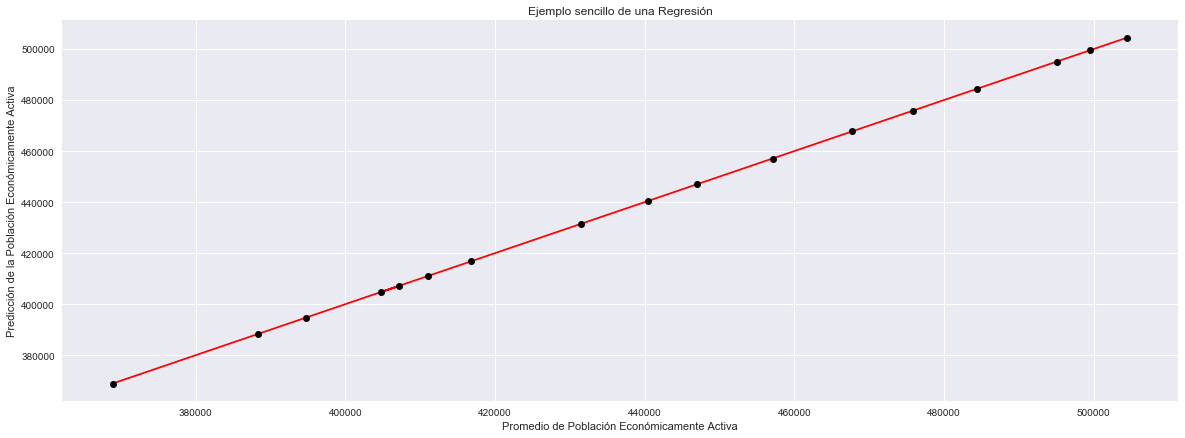

In [80]:
#Graficación de Resultados
plt.plot(Prom_PEA,Pred_PEA,'r-')
plt.plot(Prom_PEA,Prom_PEA,'ko')
plt.xlabel("Promedio de Población Económicamente Activa")
plt.ylabel("Predicción de la Población Económicamente Activa")
plt.title("Ejemplo sencillo de una Regresión")

El ejemplo anterir no es interesante del todo, ya que al final la población económicamente activa y la población desocupada guardan cierta relación y la muestra de datos se vuelve una muestra muy pequeña. Lo único que se deseaba mostrar era el hecho de poder cargar datos desde algún *repositorio, pre-procesarlos y estimar algún modelo.*

Al final en un proyecto, se invierte aproximadamene un **80%** del tiempo en preprocesar, analizar y entender los datos y la necesidad de negocio, y solo un **20%** en la aplicación de algún algoritmos, su entrenamiento y valiación.

## Otros datos en scikit-learn

La biblioteca cuenta con otros datos, para conocer toda la lista se puede explorar el objecto `datasets` , además ahora se cuenta con muchos repositorios de datos que pueden ser usados para probar algún algoritmo.

## Nota:

El pre-procesamiento, la exploración y creación de modelos anteriormente realizados son solo breves ejemplos, aún no estamos profundizando en detalles de ćomo "entrenar" y "generalizar" algún modelo. 

 ## Ejercicios
 
 Los ejercicios son pricipalmente para conocer los datos que se tienen en el módulo scikit-learn.

In [ ]:
#Ejercicio 1.- Ejecuta el siguiente código para ver la lista de bases con las que cuenta Scikit-learn
from sklearn import datasets
[datos for datos in dir(datasets) if callable(getattr(datasets, datos))]

In [39]:
# Ejercicio 2.- Carga los datos load_boston
# El código es igual al mostrado en el primer ejemplo



In [ ]:
#Ejercicio 3.- Revisa la descripción de los datos
print(Data.DESCR)


In [ ]:
#Ejercicio 4.- ¿Qué tipo de variable es target?
Data.target[:10]

In [ ]:
# Ejercicio 5.- Visualiza el histograma del target

n, bins, patches=plt.hist(Data.target,histtype='bar')
plt.title("Histograma de la variable dependiente")
plt.ylabel("Frecuencias")
plt.xlabel("Rango de Valores")